<a href="https://colab.research.google.com/github/baoson1110/ANALYZING-DATA-WITH-PYTHON/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, 
# directly below the code cell that produced it. 
# The resulting plots will then also be stored in the notebook document.
import os

In [ ]:
#loading data from csv file

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

(0.0, 53482.07122754088)

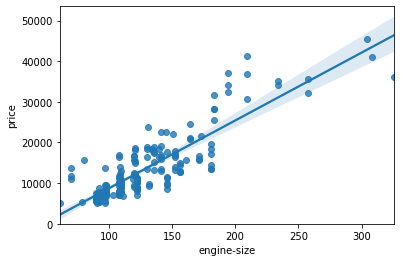

In [ ]:
### Continuous numerical variables

# In order to start understanding the (linear) relationship between an individual variable and the price.
# We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.

# Scatterplot of "engine-size" and "price"

sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

# Positive linear relationship

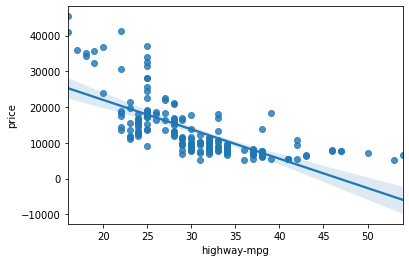

In [ ]:
# Highway mpg is a potential predictor variable of price
sns.regplot(x='highway-mpg', y='price', data = df)

# Regative linear relationship

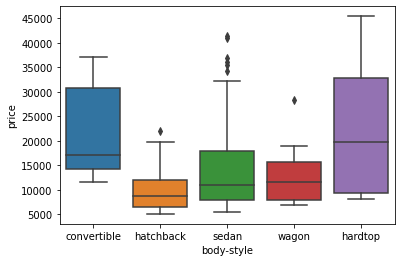

In [ ]:
#Categorical variables

# These are variables that describe a 'characteristic' of a data unit,
# and are selected from a small group of categories.
# A good way to visualize categorical variables is by using boxplots.

# Look at the relationship between "body-style" and "price"
sns.boxplot(x='body-style', y='price', data=df)

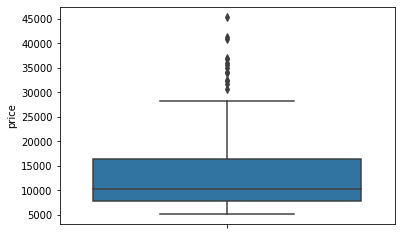

In [ ]:
# boxplot 'price' data
sns.boxplot(y='price', data=df)

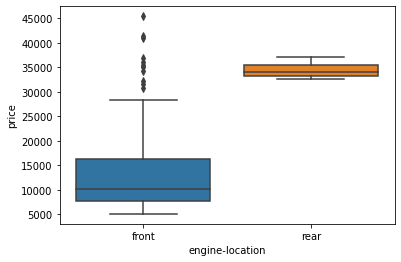

In [ ]:
# examine engine "engine-location" and "price" 

# I found 'front' and 'rear' types have the significant impact on the price of cars
sns.boxplot(data=df, x='engine-location', y='price')

In [ ]:
# Descriptive Statistical Analysis

# the describe method
df.describe(include='all')

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
count,201.000000,201.00000,201,201,201,201,201,201,201.000000,201.000000,201.000000,201.000000,201.000000,201,201,201.000000,201,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,200,201.000000,201.000000
unique,NaN,NaN,22,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,6,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,toyota,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,32,165,115,94,118,198,NaN,NaN,NaN,NaN,NaN,145,157,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,0.915126,53.766667,2555.666667,NaN,NaN,126.875622,NaN,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,NaN,0.099502,0.900498
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,0.029187,2.447822,517.296727,NaN,NaN,41.546834,NaN,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,NaN,0.300083,0.300083
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.837500,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,NaN,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,0.890278,52.000000,2169.000000,NaN,NaN,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,NaN,0.000000,1.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.909722,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,NaN,0.000000,1.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,0.925000,55.500000,2926.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,NaN,0.000000,1.000000


In [ ]:
# the describe method
df.describe(include=np.number) # equivalent to: df.describe(include='number')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [ ]:
df.describe(include=np.object) # equivalent to: df.describe(include='object')

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [ ]:
# Value Counts

# Value-counts is a good way of understanding how many units of each characteristic/variable we have. 

# ***Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. 
# As a result, we only include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".

# We can apply the "value_counts" method on the column 'drive-wheels'.

print("the data type of df['drive-wheel']: ", type(df['drive-wheels']))
print("the data type of df[['drive-wheel]]: ", type(df[['drive-wheels']]), end='\n\n')

df['drive-wheels'].value_counts()

the data type of df['drive-wheel']:  <class 'pandas.core.series.Series'>
the data type of df[['drive-wheel]]:  <class 'pandas.core.frame.DataFrame'>



fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [ ]:
# Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" 
# and rename the column 'drive-wheels' to 'value_counts'.

drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [ ]:
#  rename the index to 'drive-wheels'
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


##Basics of grouping

The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

In [ ]:
#unique values of drive-wheels
df['drive-wheels'].unique().tolist() #series -> array -> list

['rwd', 'fwd', '4wd']

In [ ]:
# If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

# We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".
# We can then calculate the average price for each of the different categories of data.

data_group_1 = df[['drive-wheels','body-style','price']]
data_group_1 = data_group_1.groupby(['drive-wheels'], as_index=False).mean()
data_group_1

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [ ]:
# groupby with multiple columns in a dataframe

data_group_2 = df[['drive-wheels','body-style','price']]
data_group_2 = data_group_2.groupby(['drive-wheels','body-style'], as_index=False).mean()
data_group_2

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.

In [ ]:
grouped_pivot = data_group_2.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

In [ ]:
# we won't have data for some of the pivot cells. We can fill these missing cells with the value 0 for simplicity

grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  0.0      0.000000  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

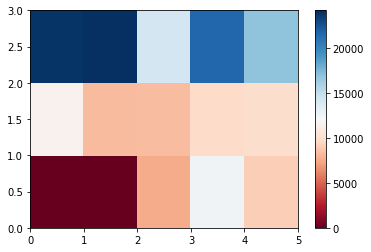

In [ ]:
# Use heat map yo visualize the relationship between body-style and price
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

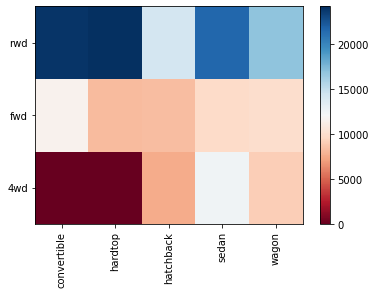

In [ ]:
# Heat map with more information

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

##**P-value:**

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.

the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.

the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.

the p-value is $>$ 0.1: there is no evidence that the correlation is significant.

We can obtain this information using "stats" module in the "scipy" library.

In [ ]:
from scipy import stats

In [ ]:
# Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


Conclusion:
Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

##**ANOVA**

ANOVA: Analysis of Variance
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

**F-test score**: ANOVA *assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score*. **A larger score** means there is **a larger difference between the means.**

**P-value**: P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.


Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

Let's see if different types 'drive-wheels' impact 'price', we group the data.

In [ ]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2) #there're 3 types of drive-wheels (rwd, fwd, 4wd), so there're a total of 6 rows when we use the head(2) method

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [ ]:
# We can examinate the number of specific drive-wheel types
df_gptest['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

 We can obtain the values of the method group using the method "get_group".  

In [ ]:
# we can use "get_group" method to get the data of a specific group we groupby-ed before
type(grouped_test2.get_group('4wd'))   # -> this is a dataframe

pandas.core.frame.DataFrame

In [ ]:
# Since grouped_test2.get_group('4wd') is dataframe type, we can slice the column and get a series as below
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

We can use the function **'f_oneway'** in the module **'stats'** to obtain the **F-test** score and **P-value.**


In [ ]:
# ANOVA

f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance.

We can examine two categories together with F-test

#### Separately: fwd and rwd

In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance.